In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/project')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/project'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing**

In [ ]:
# Data Loading
data_train = pd.read_csv('nsl-kdd/KDDTrain+.txt', header=None)
data_test = pd.read_csv('nsl-kdd/KDDTest+.txt', header=None)

In [ ]:
data_train.head()

NameError: name 'data_train' is not defined

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


In [ ]:
data_train.columns = columns
data_test.columns = columns


In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
outcome_counts = data_train['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
outcome_counts = data_test['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


In [ ]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# **Data Cleaning**

In [ ]:
null_train = data_train.isnull().sum()
null_test = data_test.isnull().sum()

print("Null values in training data:\n", null_train)
print("Null values in test data:\n", null_test)


Null values in training data:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rat

In [ ]:
duplicates_train = data_train.duplicated().sum()
duplicates_test = data_test.duplicated().sum()

print("Duplicate rows in training data:", duplicates_train)
print("Duplicate rows in test data:", duplicates_test)


Duplicate rows in training data: 0
Duplicate rows in test data: 0


In [ ]:
train_target_counts = data_train['outcome'].value_counts()
test_target_counts = data_test['outcome'].value_counts()


In [ ]:
print("Value counts of the outcome column in training data:\n", train_target_counts)

Value counts of the outcome column in training data:
 outcome
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
print("\nValue counts of the outcome column in test data:\n", test_target_counts)


Value counts of the outcome column in test data:
 outcome
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64


In [ ]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

# Align columns of test set with train set to ensure they have the same features
data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

print("Preprocessed training data shape:", data_train.shape)
print("Preprocessed test data shape:", data_test.shape)

Preprocessed training data shape: (125973, 43)
Preprocessed test data shape: (22544, 43)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

<ipython-input-19-74e50502d174>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zero_Percentage', y='Feature', data=zero_percentage_df, palette=palette)


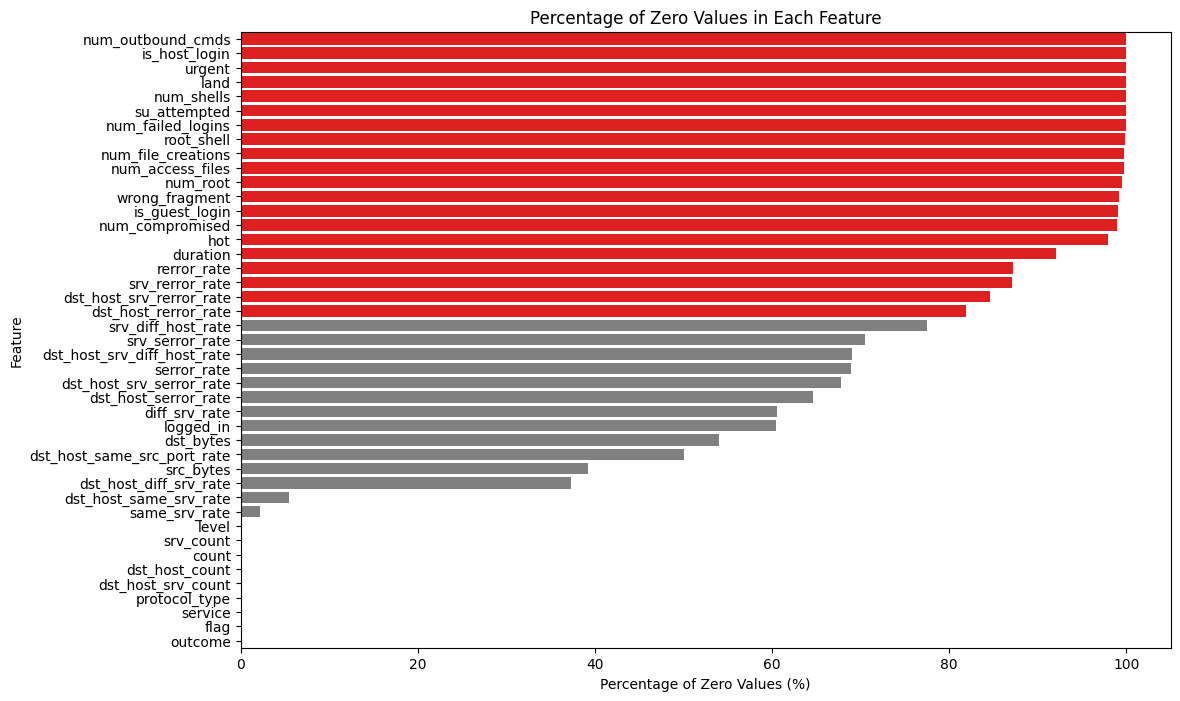

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zero_percentage = (data_train[columns] == 0).mean() * 100

zero_percentage_df = pd.DataFrame(zero_percentage, columns=['Zero_Percentage'])
zero_percentage_df = zero_percentage_df.reset_index()
zero_percentage_df.columns = ['Feature', 'Zero_Percentage']


zero_percentage_df = zero_percentage_df.sort_values('Zero_Percentage', ascending=False)

zero_percentage_df['Color'] = zero_percentage_df['Zero_Percentage'].apply(lambda x: 'red' if x > 80 else 'grey')

palette = zero_percentage_df['Color'].tolist()


plt.figure(figsize=(12, 8))
sns.barplot(x='Zero_Percentage', y='Feature', data=zero_percentage_df, palette=palette)


plt.title('Percentage of Zero Values in Each Feature')
plt.xlabel('Percentage of Zero Values (%)')
plt.ylabel('Feature')

plt.show()


In [ ]:
columns_to_drop = zero_percentage_df[zero_percentage_df['Zero_Percentage'] > 80]['Feature'].tolist()
data_train_cleaned = data_train.drop(columns=columns_to_drop)
test_data_cleaned = data_test.drop(columns=columns_to_drop)


In [ ]:
data_train_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal,20
1,udp,other,SF,146,0,0,13,1,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,123,6,1.0,1.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,neptune,19
3,tcp,http,SF,232,8153,1,5,5,0.2,0.2,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,normal,21
4,tcp,http,SF,199,420,1,30,32,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
outcome_counts = data_train_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['protocol_type', 'service', 'flag']

for column in columns_to_encode:
    data_train_cleaned[column] = label_encoder.fit_transform(data_train_cleaned[column])
    test_data_cleaned[column] = label_encoder.transform(test_data_cleaned[column])

In [ ]:
data_train_cleaned.head()



,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,20,9,491,0,0,2,2,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal,20
1,2,44,9,146,0,0,13,1,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal,15
2,1,49,5,0,0,0,123,6,1.0,1.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,neptune,19
3,1,24,9,232,8153,1,5,5,0.2,0.2,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,normal,21
4,1,24,9,199,420,1,30,32,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test_data_cleaned.head()


,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,49,1,0,0,0,229,10,0.0,0.00,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,neptune,21
1,1,49,1,0,0,0,136,1,0.0,0.00,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,neptune,21
2,1,20,9,12983,0,0,1,1,0.0,0.00,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,normal,21
3,0,14,9,20,0,0,1,65,0.0,0.00,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,saint,15
4,1,60,2,0,15,0,1,8,0.0,0.12,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,mscan,11


In [ ]:
outcome_counts = data_train_cleaned['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


# **`Make copy of data`**

In [ ]:
# Make copies of the encoded data
data_train_copy = data_train_cleaned.copy()
test_data_copy = test_data_cleaned.copy()

# Verify the copies
print("Sample from data_train_encoded:")
print(data_train_copy.head())

print("\nSample from test_data_encoded:")
print(test_data_copy.head())


Sample from data_train_encoded:
   protocol_type  service  flag  src_bytes  dst_bytes  logged_in  count  \
0              1       20     9        491          0          0      2   
1              2       44     9        146          0          0     13   
2              1       49     5          0          0          0    123   
3              1       24     9        232       8153          1      5   
4              1       24     9        199        420          1     30   

   srv_count  serror_rate  srv_serror_rate  ...  dst_host_count  \
0          2          0.0              0.0  ...             150   
1          1          0.0              0.0  ...             255   
2          6          1.0              1.0  ...             255   
3          5          0.2              0.2  ...              30   
4         32          0.0              0.0  ...             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    

# **convert data to binary classification**

set label 0 for normal and 1 for all other attacks

In [ ]:

data_train_cleaned['outcome'] = data_train_cleaned['outcome'].apply(lambda x: 0 if x == 'normal' else 1)
test_data_cleaned['outcome'] = test_data_cleaned['outcome'].apply(lambda x: 0 if x == 'normal' else 1)

print("Value counts for data_train 'outcome' column:")
print(data_train_cleaned['outcome'].value_counts())

print("\nValue counts for test_data 'outcome' column:")
print(test_data_cleaned['outcome'].value_counts())


Value counts for data_train 'outcome' column:
outcome
0    67343
1    58630
Name: count, dtype: int64

Value counts for test_data 'outcome' column:
outcome
1    12833
0     9711
Name: count, dtype: int64


In [ ]:
columns_to_analyze = data_train_cleaned.columns


for column in columns_to_analyze:
    print(f"\nValue counts for column '{column}':")
    print(data_train_cleaned[column].value_counts())
    print("="*50)


Value counts for column 'protocol_type':
protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64

Value counts for column 'service':
service
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64

Value counts for column 'flag':
flag
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64

Value counts for column 'src_bytes':
src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64

Value counts for column 'dst_bytes':
dst_bytes
0        67967
105       1497
8314       888
330        528
331        512
         ...  
30114        1
3885         1
33116        1
4056         1
52866        1
Name: 

In [ ]:
columns_to_analyze

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
data_train_cleaned.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level']


scaler = MinMaxScaler()

data_train_cleaned[columns_to_scale] = scaler.fit_transform(data_train_cleaned[columns_to_scale])
test_data_cleaned[columns_to_scale] = scaler.transform(test_data_cleaned[columns_to_scale])




In [ ]:
data_train_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.289855,9,3.558064e-07,0.000000e+00,0,0.003914,0.003914,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0,0.952381
1,2,0.637681,9,1.057999e-07,0.000000e+00,0,0.025440,0.001957,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0,0.714286
2,1,0.710145,5,0.000000e+00,0.000000e+00,0,0.240705,0.011742,1.0,1.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,1,0.904762
3,1,0.347826,9,1.681203e-07,6.223962e-06,1,0.009785,0.009785,0.2,0.2,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0,1.000000
4,1,0.347826,9,1.442067e-07,3.206260e-07,1,0.058708,0.062622,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0,1.000000


In [ ]:
test_data_cleaned.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.448141,0.019569,0.0,0.00,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1,1.000000
1,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.266145,0.001957,0.0,0.00,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1,1.000000
2,1,0.289855,9,9.408217e-06,0.000000e+00,0,0.001957,0.001957,0.0,0.00,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0,1.000000
3,0,0.202899,9,1.449313e-08,0.000000e+00,0,0.001957,0.127202,0.0,0.00,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,1,0.714286
4,1,0.869565,2,0.000000e+00,1.145093e-08,0,0.001957,0.015656,0.0,0.12,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,1,0.523810


In [ ]:
# X_train = data_train_cleaned.drop(columns=['outcome','level'])
X_train = data_train_cleaned.drop(columns=['outcome'])
y_train = data_train_cleaned['outcome']

X_test = test_data_cleaned.drop(columns=['outcome'])
# X_test = test_data_cleaned.drop(columns=['outcome','level'])
y_test = test_data_cleaned['outcome']


In [ ]:
y_train.shape

(125973,)

# **Basic Machine learning Techniques**

# **xgboost model**

Accuracy of XGBoost model: 0.9002


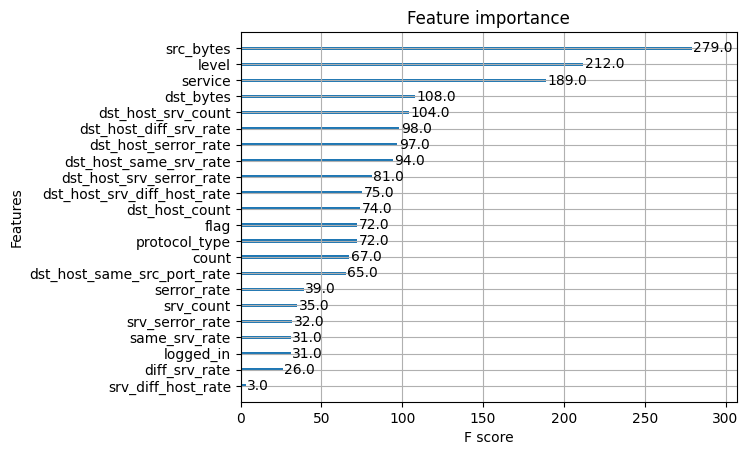

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Model training with tuned hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=500,         # More trees for better learning
    max_depth=6,              # Moderately deep trees
    learning_rate=0.2,       # Smaller steps for better generalization
    subsample=0.8,            # Sampling ratio for rows
    colsample_bytree=0.7,     # Sampling ratio for features
    gamma=1,                  # Minimum loss reduction
    min_child_weight=3,       # Minimum sum of instance weight
    reg_alpha=7.9,            # L1 regularization to reduce overfitting
    reg_lambda=13.6,           # L2 regularization
    scale_pos_weight=20        # Adjust for class imbalance
)

xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)

print(f"Accuracy of XGBoost model: {accuracy_xgb:.4f}")

# Feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      9711
           1       0.97      0.85      0.91     12833

    accuracy                           0.90     22544
   macro avg       0.90      0.91      0.90     22544
weighted avg       0.91      0.90      0.90     22544


Confusion Matrix:


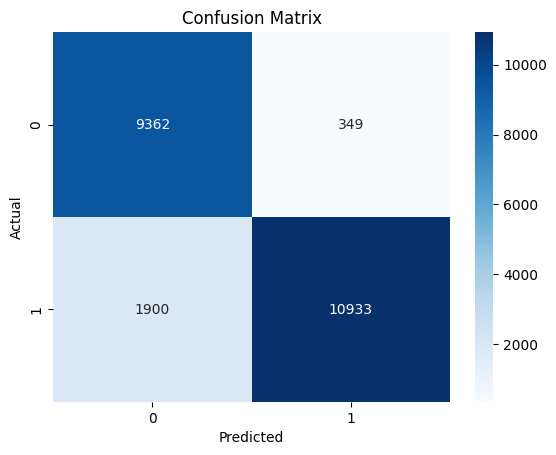

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest Model**

Accuracy of Random Forest model: 0.8367

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      9711
           1       0.97      0.74      0.84     12833

    accuracy                           0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.87      0.84      0.84     22544


Confusion Matrix:


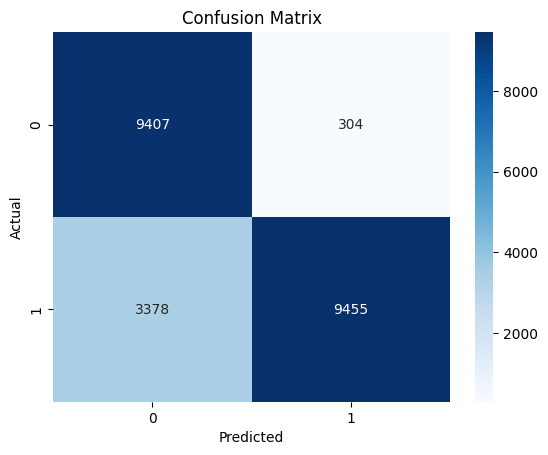


Feature Importance:


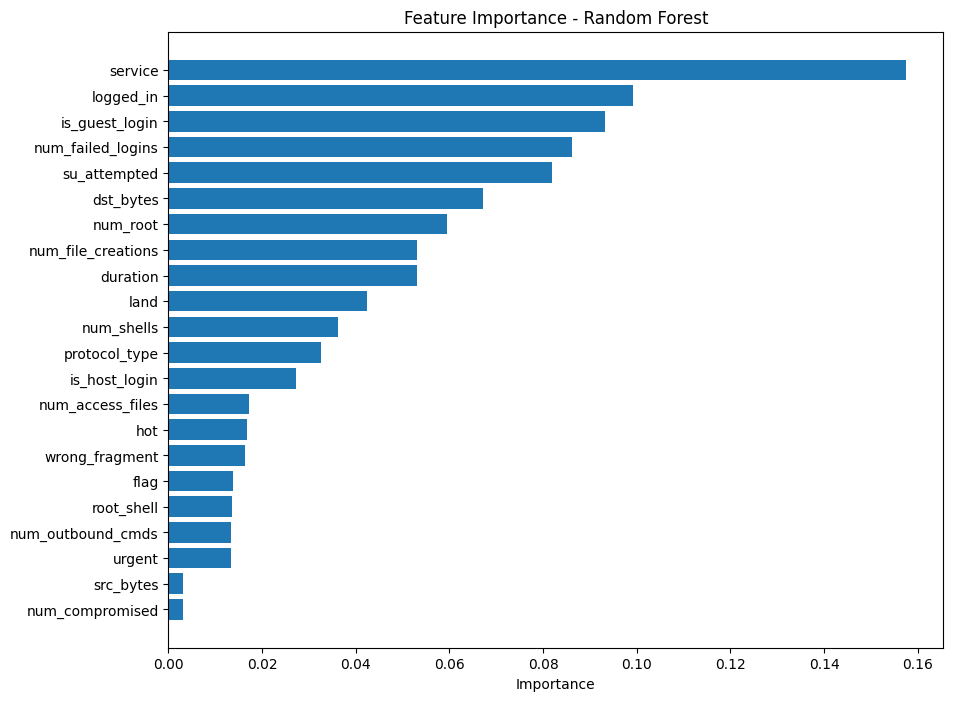

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Updated Random Forest parameters
rf_model = RandomForestClassifier(
    n_estimators=200,           # Increased number of trees for better learning
    criterion='gini',           # Gini criterion remains the same
    max_depth=20,               # Limiting depth to prevent overfitting
    min_samples_split=15,        # More samples required to split nodes
    min_samples_leaf=7,         # Minimum number of samples per leaf
    max_features='sqrt',        # Balanced feature selection per split
    bootstrap=True,             # Sampling with replacement
    class_weight='balanced',    # Adjust for class imbalance
    random_state=42,
    n_jobs=-1                   # Utilize all CPU cores
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nFeature Importance:")
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [columns[i] for i in sorted_idx])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()

# **Logistic Regression model**

Accuracy of Logistic Regression model: 0.8665

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      9711
           1       0.93      0.83      0.88     12833

    accuracy                           0.87     22544
   macro avg       0.87      0.87      0.87     22544
weighted avg       0.87      0.87      0.87     22544


Confusion Matrix:


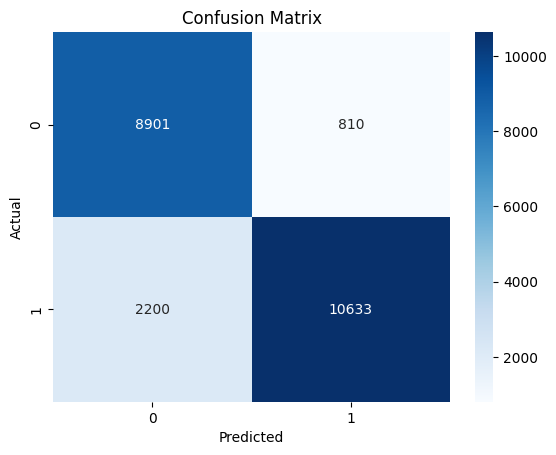

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr_model = LogisticRegression(
    solver='liblinear',  # Solver choice (liblinear is good for small datasets and binary classification)
    max_iter=1000,       # Increase iterations if convergence is not achieved
    random_state=42,
    class_weight='balanced'  # Balance class weights if your dataset is imbalanced
)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy_lr:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **knn model**

Accuracy of KNN model: 0.8719

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      9711
           1       0.96      0.80      0.88     12833

    accuracy                           0.87     22544
   macro avg       0.88      0.88      0.87     22544
weighted avg       0.89      0.87      0.87     22544


Confusion Matrix:


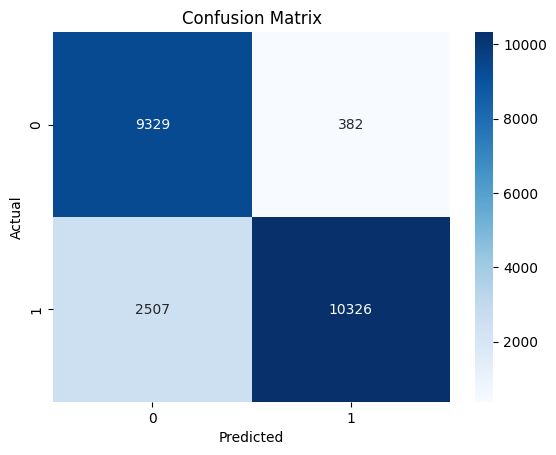

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(
    n_neighbors=90,        # Number of neighbors to use (default is 5)
    weights='uniform',    # 'uniform' means each neighbor has the same weight
    algorithm='auto',     # 'auto' means the algorithm will choose the best method (brute force, kd_tree, etc.)
    p=2,                  # Power parameter for the Minkowski distance (2 for Euclidean distance)
    metric='minkowski',   # Distance metric
    n_jobs=-1             # Use all available CPUs
)

knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy_knn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the MLP model with Dropout layers
mlp_model = Sequential()

mlp_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))  # Dropout layer with 30% rate

mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.4))

# mlp_model.add(Dense(8, activation='relu'))
# mlp_model.add(BatchNormalization())
# mlp_model.add(Dropout(0.3))

# Output layer
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62987/62987 ━━━━━━━━━━━━━━━━━━━━ 172s 3ms/step - accuracy: 0.7283 - loss: 0.5424 - val_accuracy: 0.8587 - val_loss: 0.5284
Epoch 2/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step - accuracy: 0.7553 - loss: 0.4696 - val_accuracy: 0.9216 - val_loss: 0.2201
Epoch 3/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 161s 3ms/step - accuracy: 0.7611 - loss: 0.4558 - val_accuracy: 0.9173 - val_loss: 0.4116
Epoch 4/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 163s 3ms/step - accuracy: 0.7659 - loss: 0.4623 - val_accuracy: 0.9356 - val_loss: 0.2018
Epoch 5/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 202s 3ms/step - accuracy: 0.7584 - loss: 0.4600 - val_accuracy: 0.9344 - val_loss: 0.2039
Epoch 6/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 227s 4ms/step - accuracy: 0.7622 - loss: 0.4520 - val_accuracy: 0.9240 - val_loss: 0.3428
Epoch 7/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 232s 3ms/step - accuracy: 0.7603 - loss: 0.4641 - val_accuracy: 0.9251 - val_loss: 0.2725
Epoch 8/10
62987/62987 ━━━━━━━━━━━━━━━━━━━━ 176s 3ms/step - accuracy: 0.7

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy of the MLP model: 0.9320

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      9711
           1       0.91      0.98      0.94     12833

    accuracy                           0.93     22544
   macro avg       0.94      0.92      0.93     22544
weighted avg       0.93      0.93      0.93     22544



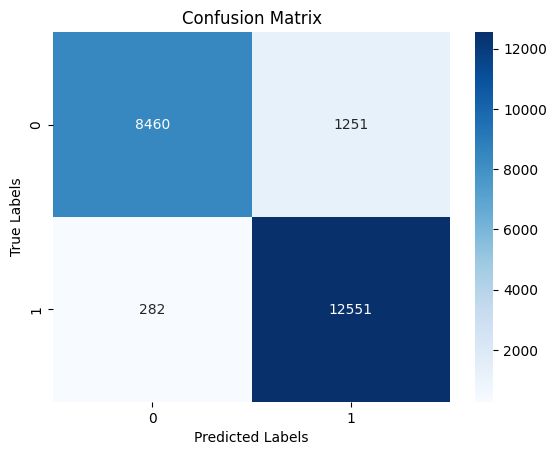

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Evaluate the model
y_pred = mlp_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Accuracy score
accuracy_mlp = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy of the MLP model: {accuracy_mlp:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **ML Models Comaprison**

<ipython-input-78-c404ce8ab7c3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


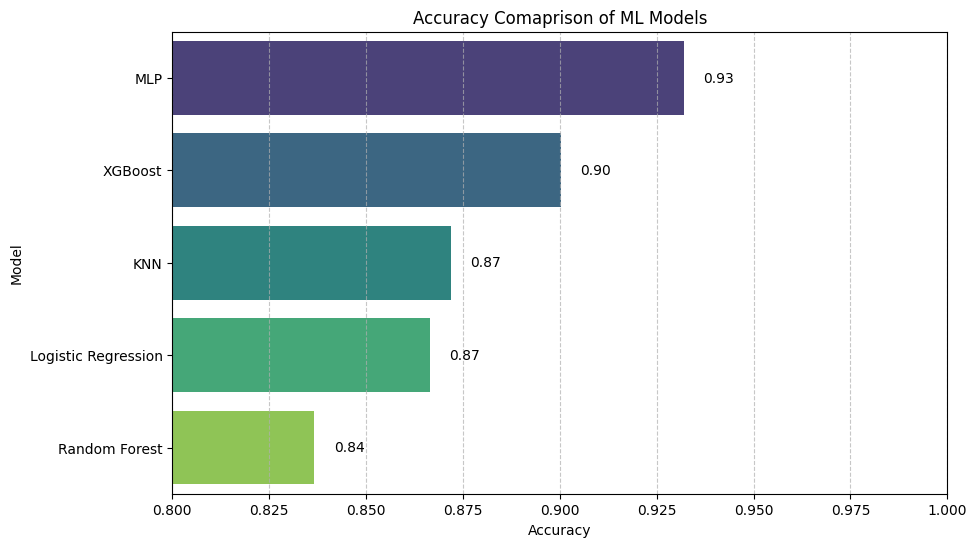

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace these with the actual accuracies from your results
model_names = ['XGBoost', 'Random Forest', 'Logistic Regression', 'KNN', 'MLP']
accuracies = [accuracy_xgb, accuracy_rf, accuracy_lr, accuracy_knn, accuracy_mlp]  # Replace with your actual accuracy values

# Create a DataFrame for easier plotting (optional)
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Sort the DataFrame by accuracy (optional)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')

# Add text annotations for accuracy values
for i in range(len(results_df)):
    plt.text(results_df['Accuracy'].iloc[i] + 0.005, i, f"{results_df['Accuracy'].iloc[i]:.2f}", va='center')

# Styling the plot
plt.title('Accuracy Comaprison of ML Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)  # Adjust limits as needed
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# **Deep Learning Techniques**

# **RNN Model**

In [1]:
# from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
#from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization

#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(16, input_shape=(X_train.shape[1], 1), activation='relu'))
#rnn_model.add(BatchNormalization())
#rnn_model.add(Dropout(0.5))
#rnn_model.add(Dense(4, activation='relu'))
#rnn_model.add(BatchNormalization())
#rnn_model.add(Dropout(0.5))
#rnn_model.add(Dense(2, activation='relu'))
#rnn_model.add(BatchNormalization())
#rnn_model.add(Dropout(0.3))
#rnn_model.add(Dense(1, activation='sigmoid'))


#rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#rnn_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

# **ANN Model**

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
ann= classifier.fit(x_train, y_train, validation_split=0.2, batch_size = 2, epochs = 10,verbose = 1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50389/50389 ━━━━━━━━━━━━━━━━━━━━ 110s 2ms/step - accuracy: 0.9742 - loss: 0.0748 - val_accuracy: 0.9943 - val_loss: 0.0203
Epoch 2/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.9930 - loss: 0.0199 - val_accuracy: 0.9946 - val_loss: 0.0179
Epoch 3/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.9937 - loss: 0.0171 - val_accuracy: 0.9944 - val_loss: 0.0207
Epoch 4/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9941 - loss: 0.0156 - val_accuracy: 0.9949 - val_loss: 0.0206
Epoch 5/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - accuracy: 0.9943 - loss: 0.0160 - val_accuracy: 0.9940 - val_loss: 0.0225
Epoch 6/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9947 - loss: 0.0149 - val_accuracy: 0.9913 - val_loss: 0.0308
Epoch 7/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9951 - val_loss: 0.0228
Epoch 8/10
50389/50389 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9950

# **Deep Learning models comparison**

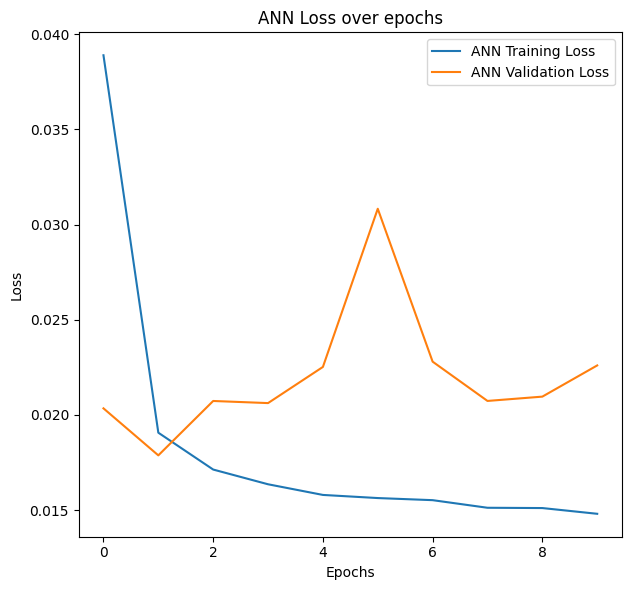

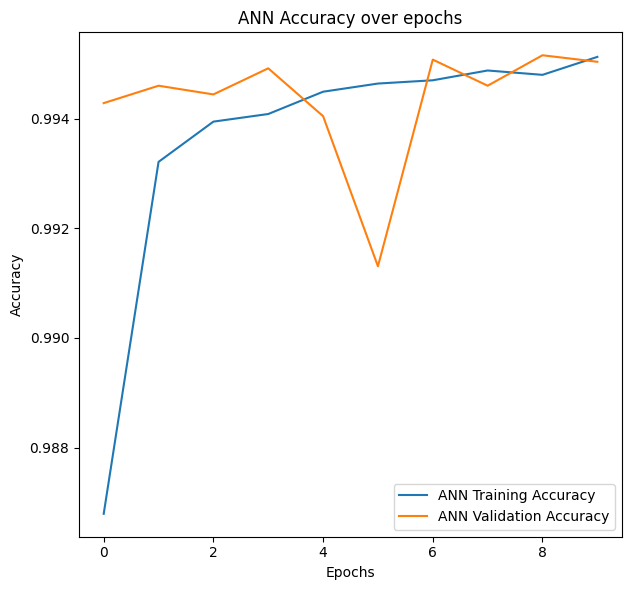

In [ ]:
import matplotlib.pyplot as plt

# 3. Plotting Training and Validation Loss & Accuracy for both models
plt.figure(figsize=(12, 6))

#Loss plots
# Plot for ANN
plt.subplot(1, 2, 1)
plt.plot(ann.history['loss'], label='ANN Training Loss')
plt.plot(ann.history['val_loss'], label='ANN Validation Loss')
plt.title('ANN Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Plot for ANN
plt.subplot(1, 2, 1)
plt.plot(ann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.title('ANN Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()


# **ML vs DL models performance**

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9951 - loss: 0.0138
ANN Model - Test Loss: 0.015567163936793804, Test Accuracy: 0.9949116110801697


<ipython-input-87-f368241f9660>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


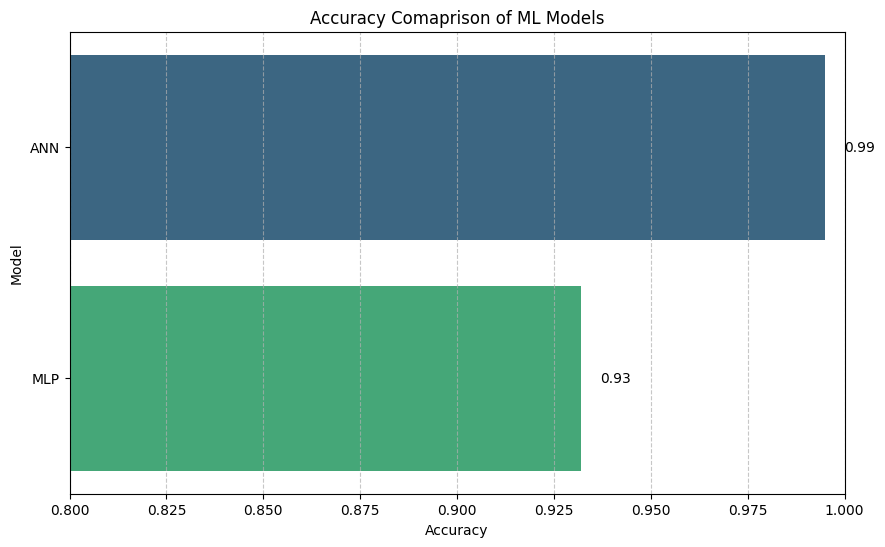

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Evaluate ANN model on the test set
ann_loss, ann_accuracy = classifier.evaluate(x_train, y_train)
print(f"ANN Model - Test Loss: {ann_loss}, Test Accuracy: {ann_accuracy}")

# Replace these with the actual accuracies from your results
model_names = ['MLP', 'ANN']
accuracies = [accuracy_mlp, ann_accuracy]  # Replace with your actual accuracy values

# Create a DataFrame for easier plotting (optional)
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Sort the DataFrame by accuracy (optional)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')

# Add text annotations for accuracy values
for i in range(len(results_df)):
    plt.text(results_df['Accuracy'].iloc[i] + 0.005, i, f"{results_df['Accuracy'].iloc[i]:.2f}", va='center')

# Styling the plot
plt.title('Accuracy Comaprison of ML Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)  # Adjust limits as needed
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# **convert data to multi classification**

In [ ]:
outcome_counts = data_train['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
outcome_counts = data_test['outcome'].value_counts()
outcome_counts

,count
outcome,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


*   httptuneel
*   xterm
*   SQLattack
*   ps

**there is no data in train so we did not include these four classes in multi-class classifcation**

*   buffer_overflow
*   rootkit
*   loadmodule
*   perl

**these four classes are duplicates in class 2 and 4 but  added these into class 4 only because for other 4 classes defined in paper has no data n tran data**

In [ ]:
# Define the correct mapping for each class
class_mapping = {
    'normal': 0,
    'back': 1, 'land': 1, 'teardrop': 1, 'neptune': 1, 'pod': 1, 'smurf': 1,
    'buffer_overflow': 4, 'ftp_write': 2, 'guess_passwd': 2, 'imap': 2,
    'loadmodule': 4, 'multihop': 2, 'perl': 4, 'phf': 2,
    'rootkit': 4, 'spy': 2, 'warezclient': 2, 'warezmaster': 2,
    'ipsweep': 3, 'nmap': 3, 'portsweep': 3, 'satan': 3
}

# Apply the mapping to the 'outcome' column in both training and test datasets
data_train_copy['outcome'] = data_train_copy['outcome'].map(class_mapping).fillna(0).astype(int)
test_data_copy['outcome'] = test_data_copy['outcome'].map(class_mapping).fillna(0).astype(int)

# Display the value counts to verify
print("Value counts for data_train 'outcome' column:")
print(data_train_copy['outcome'].value_counts())

print("\nValue counts for test_data 'outcome' column:")
print(test_data_copy['outcome'].value_counts())


Value counts for data_train 'outcome' column:
outcome
0    67343
1    45927
3    11656
2      995
4       52
Name: count, dtype: int64

Value counts for test_data 'outcome' column:
outcome
0    13461
1     5741
2     2199
3     1106
4       37
Name: count, dtype: int64


In [ ]:
columns_to_analyze = data_train_copy.columns
for column in columns_to_analyze:
    print(f"\nValue counts for column '{column}':")
    print(data_train_copy[column].value_counts())
    print("="*50)


Value counts for column 'protocol_type':
protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64

Value counts for column 'service':
service
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64

Value counts for column 'flag':
flag
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: count, dtype: int64

Value counts for column 'src_bytes':
src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64

Value counts for column 'dst_bytes':
dst_bytes
0        67967
105       1497
8314       888
330        528
331        512
         ...  
30114        1
3885         1
33116        1
4056         1
52866        1
Name: 

In [ ]:
columns_to_analyze

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
data_train_copy.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'outcome', 'level'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['service', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'level']


scaler = MinMaxScaler()

data_train_copy[columns_to_scale] = scaler.fit_transform(data_train_copy[columns_to_scale])
test_data_copy[columns_to_scale] = scaler.transform(test_data_copy[columns_to_scale])

In [ ]:
data_train_copy.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.289855,9,3.558064e-07,0.000000e+00,0,0.003914,0.003914,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0,0.952381
1,2,0.637681,9,1.057999e-07,0.000000e+00,0,0.025440,0.001957,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0,0.714286
2,1,0.710145,5,0.000000e+00,0.000000e+00,0,0.240705,0.011742,1.0,1.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,1,0.904762
3,1,0.347826,9,1.681203e-07,6.223962e-06,1,0.009785,0.009785,0.2,0.2,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0,1.000000
4,1,0.347826,9,1.442067e-07,3.206260e-07,1,0.058708,0.062622,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0,1.000000


In [ ]:
test_data_copy.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,outcome,level
0,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.448141,0.019569,0.0,0.00,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1,1.000000
1,1,0.710145,1,0.000000e+00,0.000000e+00,0,0.266145,0.001957,0.0,0.00,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1,1.000000
2,1,0.289855,9,9.408217e-06,0.000000e+00,0,0.001957,0.001957,0.0,0.00,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0,1.000000
3,0,0.202899,9,1.449313e-08,0.000000e+00,0,0.001957,0.127202,0.0,0.00,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0,0.714286
4,1,0.869565,2,0.000000e+00,1.145093e-08,0,0.001957,0.015656,0.0,0.12,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0,0.523810


In [ ]:
# X_train = data_train_cleaned.drop(columns=['outcome','level'])
X_train_multi = data_train_copy.drop(columns=['outcome'])
y_train_multi = data_train_copy['outcome']

X_test_multi = test_data_copy.drop(columns=['outcome'])
y_test_multi = test_data_copy['outcome']


In [ ]:
y_train_multi.shape

(125973,)

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_multi = sc.fit_transform(X_train_multi)
X_test_multi = sc.transform(X_test_multi)

# **MLP Multi-class classification**